In [1]:
import shapely
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly
import contextily as cx
import json
import shapely
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

# Loading project data

In [2]:
subscr_df = pd.read_csv("../data/subscribers_geocoded_and_matched.csv", low_memory=False)
subscr_gdf = gpd.GeoDataFrame(subscr_df, geometry = gpd.points_from_xy(subscr_df['Longitude'], subscr_df['Latitude']))
subscr_gdf = subscr_gdf.set_crs("EPSG:4326")
subscr_gdf

,sub_pk,Project ID,Subscriber Type,Price,Period Start Date,Period End Date,Offering Type,Download Speed,Upload Speed,Address,...,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,full_address,Bing_lat_y,Bing_lng_y,best_lat,best_lng,geometry
0,818,IA1701-A61,Residence,49.95,1/1/2021,12/31/2021,Data,25,2.0,25572 Highway 12,...,LUCY,NaN,DENNISON,3.0,"25572 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.685230,-96.567011,POINT (-96.57196 42.68890)
1,819,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,25754 Highway 12,...,JULIA N,NaN,CURRY,1.0,"25754 HIGHWAY 12, WESTFIELD, IA, 51062",NaN,NaN,42.683011,-96.562288,POINT (-96.57196 42.68890)
2,820,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,3.0,21601 N Ridge Rd,...,CINDY,M,LLOYD,3.0,"21601 N RIDGE RD, WESTFIELD, IA, 51062",NaN,NaN,42.742318,-96.588417,POINT (-96.52416 42.71772)
3,821,IA1701-A61,Residence,59.95,1/1/2021,12/31/2021,Data,75,10.0,23079 K18n,...,NaN,NaN,NaN,3.0,"23079 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.719780,-96.476048,POINT (-96.52416 42.71772)
4,822,IA1701-A61,Residence,32.95,1/1/2021,12/31/2021,Data/Voice,25,2.0,23345 K18n,...,NaN,NaN,NaN,3.0,"23345 K18N, WESTFIELD, IA, 51062",NaN,NaN,42.716212,-96.476020,POINT (-96.52416 42.71772)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,3218,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,7590 151st Ave NE,...,SHELLE A,NaN,SCHMIDT,1.0,"7590 151ST AVE NE, GRAFTON, ND, 58237",NaN,NaN,48.512530,-97.384114,POINT (-97.38411 48.51253)
914,3219,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,15229 76th St NE,...,DAVID,NaN,SZKLARSKI,1.0,"15229 76TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.513970,-97.362770,POINT (-97.36277 48.51397)
915,3220,ND1702-A59,Residence,45.65,1/1/2021,12/31/2021,Data/Voice/Video,50,50.0,15149 76th St NE,...,NaN,NaN,NaN,3.0,"15149 76TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.514241,-97.374062,POINT (-97.37406 48.51424)
916,3224,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,15207 77th St NE,...,NaN,NaN,NaN,3.0,"15207 77TH ST NE, GRAFTON, ND, 58237",NaN,NaN,48.528158,-97.363528,POINT (-97.36353 48.52816)


In [4]:
# dataset filtered by rural buffer zone, based on the data we geocoded
bk_df = pd.read_csv("../data/bk_in_rural_buffer.csv", low_memory=False, index_col=0)
bk_gdf = gpd.GeoDataFrame(bk_df, geometry=gpd.points_from_xy(bk_df.property_address_longitude, bk_df.property_address_latitiude), crs=subscr_gdf.crs)
bk_gdf

,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,property_zip4,...,full_address,Bing_lat,Bing_lng,geometry_left,index_right,Project ID,geometry_right,area,buffer_zone,geometry
dpid,,,,,,,,,,,,,,,,,,,,,
191670009201,19167,9229,08-33-226-001,NaN,NaN,1991 380TH ST,HAWARDEN,IA,51023.0,7542.0,...,"1991 380TH ST, HAWARDEN, IA, 51023",NaN,NaN,POINT (-96.394304 43.096962),1,IA1701-A61,"MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42....",0.079482,POLYGON ((-96.95195076916806 43.01446764052844...,POINT (-96.39430 43.09696)
191670009203,19167,9231,08-33-276-001,NaN,NaN,3839 COOLIDGE AVE,HAWARDEN,IA,51023.0,7576.0,...,"3839 COOLIDGE AVE, HAWARDEN, IA, 51023",NaN,NaN,POINT (-96.394362 43.093297),1,IA1701-A61,"MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42....",0.079482,POLYGON ((-96.95195076916806 43.01446764052844...,POINT (-96.39436 43.09330)
191670033058,19167,31439,08-33-376-004,NaN,NaN,1930 390TH ST,HAWARDEN,IA,51023.0,7538.0,...,"1930 390TH ST, HAWARDEN, IA, 51023",NaN,NaN,POINT (-96.406179 43.084387),1,IA1701-A61,"MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42....",0.079482,POLYGON ((-96.95195076916806 43.01446764052844...,POINT (-96.40618 43.08439)
191670033060,19167,31441,08-34-126-004,NaN,NaN,2049 380TH ST,ROCK VALLEY,IA,51247.0,NaN,...,"2049 380TH ST, ROCK VALLEY, IA, 51247",NaN,NaN,POINT (-96.389687 43.090801),1,IA1701-A61,"MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42....",0.079482,POLYGON ((-96.95195076916806 43.01446764052844...,POINT (-96.38969 43.09080)
191670009218,19167,9246,08-34-226-003,NaN,NaN,3805 DIPPER AVE,HAWARDEN,IA,51023.0,7420.0,...,"3805 DIPPER AVE, HAWARDEN, IA, 51023",NaN,NaN,POINT (-96.373194 43.09721500000001),1,IA1701-A61,"MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42....",0.079482,POLYGON ((-96.95195076916806 43.01446764052844...,POINT (-96.37319 43.09722)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292110006806,29211,6917,11000019201,NaN,P,44779 WALNUT RD,BROWNING,MO,64630.0,7134.0,...,"44779 WALNUT RD, BROWNING, MO, 64630",NaN,NaN,POINT (-93.27404 40.046193),2,MO1701-A60,"MULTIPOLYGON (((-93.5615 40.0758, -93.5622 40....",0.023070,POLYGON ((-93.54540883824883 39.73693443801911...,POINT (-93.27404 40.04619)
292110006808,29211,6919,11000019400,NaN,P,33662 BLOSSOM DR,BROWNING,MO,64630.0,7120.0,...,"33662 BLOSSOM DR, BROWNING, MO, 64630",NaN,NaN,POINT (-93.286035 40.039765),2,MO1701-A60,"MULTIPOLYGON (((-93.5615 40.0758, -93.5622 40....",0.023070,POLYGON ((-93.54540883824883 39.73693443801911...,POINT (-93.28603 40.03977)
292110006787,29211,6898,11000017700,NaN,P,32041 HIGHWAY DD,BROWNING,MO,64630.0,7132.0,...,"32041 HIGHWAY DD, BROWNING, MO, 64630",NaN,NaN,POINT (-93.274633 40.060006),2,MO1701-A60,"MULTIPOLYGON (((-93.5615 40.0758, -93.5622 40....",0.023070,POLYGON ((-93.54540883824883 39.73693443801911...,POINT (-93.27463 40.06001)


## load and clean scrapped data

In [65]:
buffer_scrap = pd.read_csv("buffer_scrapped.csv", index_col = 0)
# this is my stupid mistake. I deleted the original index when loading data in R!
buffer_scrap.index = pd.read_csv("../data_joining/ndproject_bufferzone_full_address.csv", dtype={'dpid': str})['dpid']  
buffer_scrap

,full_address,must_inc_number_address,bedrooms,bathrooms,sqft,text,source
dpid,,,,,,,
380670003021,"8295 159TH AVE NE, DRAYTON, ND, 58225","""8295"" 159TH AVE NE, DRAYTON, ND, 58225",NaN,NaN,NaN,"8295 159th Ave NE, Drayton, ND 58225 - Zilloww...",zillow
380990013007,"342 WILSON AVE, MINTO, ND, 58261","""342"" WILSON AVE, MINTO, ND, 58261",NaN,NaN,NaN,"342 Wilson Ave, Minto, ND 58261 - Zillowwww.zi...",zillow
380990013006,"334 WILSON AVE, MINTO, ND, 58261","""334"" WILSON AVE, MINTO, ND, 58261",NaN,NaN,NaN,"334 Wilson Ave, Minto, ND 58261 - Zillowwww.zi...",zillow
270890009195,"24365 410TH AVE NW, WARREN, MN, 56762","""24365"" 410TH AVE NW, WARREN, MN, 56762",NaN,NaN,NaN,"24365 410th Ave NW, Warren, MN 56762 - Zilloww...",zillow
270690004715,"1601 180TH ST, KENNEDY, MN, 56733","""1601"" 180TH ST, KENNEDY, MN, 56733",NaN,NaN,NaN,"1601 180th St, Kennedy, MN 56733 | Zillowwww.z...",zillow
...,...,...,...,...,...,...,...
380910005866,"105 TYLER CT, FINLEY, ND, 58230","""105"" TYLER CT, FINLEY, ND, 58230",0.0,0.0,NaN,Zillowhttps://www.zillow.com/homedetails/105-T...,zillow
380910005867,"107 TYLER CT, FINLEY, ND, 58230","""107"" TYLER CT, FINLEY, ND, 58230",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/107-T...,zillow
380910005869,"101 GRANT ST, FINLEY, ND, 58230","""101"" GRANT ST, FINLEY, ND, 58230",0.0,0.0,NaN,Zillowhttps://www.zillow.com/homedetails/101-G...,zillow


In [11]:
sub_scrap = pd.read_csv("subscriber_scrapped.csv", index_col = 0)
sub_scrap

,full_address,must_inc_number_address,bedrooms,bathrooms,sqft,text,source
590,"1805 RYLEE RD NE, LARIMORE, ND, 58251","""1805"" RYLEE RD NE, LARIMORE, ND, 58251",NaN,NaN,NaN,Zillowhttps://www.zillow.com › homedetails › 1...,zillow
591,"1813 RYLEE RD NE, LARIMORE, ND, 58251","""1813"" RYLEE RD NE, LARIMORE, ND, 58251",0.0,0.0,NaN,Zillowhttps://www.zillow.com/homedetails/1813-...,zillow
592,"3550 US 2, LARIMORE, ND, 58251","""3550"" US 2, LARIMORE, ND, 58251",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/3550-...,zillow
593,"3552 US 2, LARIMORE, ND, 58251","""3552"" US 2, LARIMORE, ND, 58251",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/3552-...,zillow
594,"3566 US 2, LARIMORE, ND, 58251","""3566"" US 2, LARIMORE, ND, 58251",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/3566-...,zillow
...,...,...,...,...,...,...,...
913,"7590 151ST AVE NE, GRAFTON, ND, 58237","""7590"" 151ST AVE NE, GRAFTON, ND, 58237",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/7590-...,zillow
914,"15229 76TH ST NE, GRAFTON, ND, 58237","""15229"" 76TH ST NE, GRAFTON, ND, 58237",0.0,0.0,NaN,Zillowhttps://www.zillow.com/homedetails/15229...,zillow
915,"15149 76TH ST NE, GRAFTON, ND, 58237","""15149"" 76TH ST NE, GRAFTON, ND, 58237",NaN,NaN,NaN,Zillowhttps://www.zillow.com/homedetails/15149...,zillow
916,"15207 77TH ST NE, GRAFTON, ND, 58237","""15207"" 77TH ST NE, GRAFTON, ND, 58237",0.0,0.0,NaN,Zillowhttps://www.zillow.com/homedetails/15207...,zillow


In [12]:
sub_scrap.dtypes

full_address                object
must_inc_number_address     object
bedrooms                   float64
bathrooms                  float64
sqft                        object
text                        object
source                      object
dtype: object

In [122]:
# Zillow results can give 0 and 0.0 in place of -- missing bed and bath in Bing
# Exact reason behind this is unknown. Here we take a conservative way to select
# valid data: if sqft is NA and bed-bath is 0, then it's invalid

def is_row_invalid(df: pd.DataFrame):
    return (df.bedrooms == 0) & (df.bathrooms == 0) & df.sqft.isna()
    
sub_scrap[is_row_invalid(sub_scrap)] = sub_scrap[is_row_invalid(sub_scrap)].replace(0, np.NAN)
buffer_scrap[is_row_invalid(buffer_scrap)] = buffer_scrap[is_row_invalid(buffer_scrap)].replace(0, np.NAN)

In [33]:
sub_scrap.dropna().shape[0]  # 20.73% subscribers have all 3 columns scrapped

68

In [32]:
buffer_scrap.dropna().shape[0]  # 14.04% bufferzoners have all 3 scrapped

458

In [139]:
bk_gdf.loc[buffer_scrap.dropna().index, :].drop_duplicates()['property_state'].value_counts()

ND    360
MN     95
Name: property_state, dtype: int64

In [39]:
sub_scrap.apply(lambda row: row.isna().sum() < 3, axis = 1).sum()  # 25.0% subscribers have at least one thing scrapped

82

In [40]:
buffer_scrap.apply(lambda row: row.isna().sum() < 3, axis = 1).sum()  # 19.4% subscribers have at least one thing scrapped

633

# merge scrapped data

In [41]:
bk_gdf['Project ID'].unique()

array(['IA1701-A61', 'ND1702-A59', 'MO1701-A60'], dtype=object)

In [47]:
bk_gdf = bk_gdf[bk_gdf['Project ID'] == "ND1702-A59"]
bk_gdf.loc[:, ["numberof_bedrooms", "numberof_baths", "building_area"]].value_counts()

numberof_bedrooms  numberof_baths  building_area
0                  0               0                3112
                                   1176                2
                                   1352                2
                                   924                 2
                                   912                 2
                                                    ... 
                                   1552                1
                                   1464                1
                                   1460                1
                                   1428                1
6                  200             2740                1
Length: 144, dtype: int64

In [123]:
buffer_gdf = bk_gdf.merge(buffer_scrap.loc[:, ["bedrooms", "bathrooms", "sqft"]], left_index=True, right_index=True, how='inner').drop_duplicates()
buffer_gdf

,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,property_zip4,...,geometry_left,index_right,Project ID,geometry_right,area,buffer_zone,geometry,bedrooms,bathrooms,sqft
dpid,,,,,,,,,,,,,,,,,,,,,
270690004715,27069,4721,230271540,NaN,NaN,1601 180TH ST,KENNEDY,MN,56733.0,9559.0,...,POINT (-97.093297 48.656489),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.09330 48.65649),NaN,NaN,NaN
270690005594,27069,5616,270060540,NaN,NaN,1914 150TH ST,KENNEDY,MN,56733.0,9551.0,...,POINT (-97.03967 48.617404),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.03967 48.61740),NaN,NaN,NaN
270690005676,27069,5698,270182060,NaN,NaN,1973 140TH ST,KENNEDY,MN,56733.0,9541.0,...,POINT (-97.023967 48.600552),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.02397 48.60055),NaN,NaN,NaN
270690005678,27069,5700,270182100,NaN,NaN,1366 190TH AVE,KENNEDY,MN,56733.0,9547.0,...,POINT (-97.040282 48.598015),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.04028 48.59801),NaN,NaN,NaN
270690005679,27069,5701,270182120,NaN,NaN,1952 130TH ST,KENNEDY,MN,56733.0,NaN,...,POINT (-97.037148 48.591248),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.03715 48.59125),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380990016007,38099,15676,19000004955010,NaN,B,6751 COUNTY ROAD 12B,PARK RIVER,ND,58270.0,9655.0,...,POINT (-97.7532 48.3784),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.75320 48.37840),NaN,NaN,NaN
380990016056,38099,15726,09000002269010,NaN,B,5519 147TH AVE NE,FOREST RIVER,ND,58233.0,9604.0,...,POINT (-97.454169 48.211128),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.45417 48.21113),NaN,NaN,NaN
380990016093,38099,15763,16000004065010,NaN,B,13867 76TH ST NE,HOOPLE,ND,58243.0,9524.0,...,POINT (-97.652163 48.514282),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.65216 48.51428),NaN,NaN,NaN


In [121]:
sub_gdf = subscr_gdf.merge(sub_scrap.loc[:, ["bedrooms", "bathrooms", "sqft"]], left_index=True, right_index=True)
subscr_cleaned = sub_gdf[~sub_gdf["bedrooms"].isna() | ~sub_gdf["bathrooms"].isna() | ~sub_gdf["sqft"].isna()]
subscr_cleaned

,sub_pk,Project ID,Subscriber Type,Price,Period Start Date,Period End Date,Offering Type,Download Speed,Upload Speed,Address,...,parsed_owner_source_code,full_address,Bing_lat_y,Bing_lng_y,best_lat,best_lng,geometry,bedrooms,bathrooms,sqft
595,2762,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,3577 US 2,...,2.0,"3577 US 2, LARIMORE, ND, 58251",NaN,NaN,47.946100,-97.595355,POINT (-97.66728 47.92343),3.0,2.0,NaN
597,2767,ND1702-A59,Residence,147.95,1/1/2021,12/31/2021,Data,500,500.0,11 30th St NE,...,1.0,"11 30TH ST NE, HATTON, ND, 58240",NaN,NaN,47.674016,-97.476759,POINT (-97.47676 47.67402),3.0,1.0,"1,568"
604,2776,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,3373 1st Ave NE,...,3.0,"3373 1ST AVE NE, NORTHWOOD, ND, 58267",NaN,NaN,47.683851,-97.555601,POINT (-97.55560 47.68385),3.0,1.0,"1,352"
608,2782,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,118 41st St NE,...,3.0,"118 41ST ST NE, NORTHWOOD, ND, 58267",NaN,NaN,47.689194,-97.709229,POINT (-97.70923 47.68919),2.0,2.0,"1,500"
609,2783,ND1702-A59,Residence,45.65,1/1/2021,12/31/2021,Data/Voice/Video,50,50.0,3332 1st Ave NE,...,2.0,"3332 1ST AVE NE, NORTHWOOD, ND, 58267",NaN,NaN,47.690038,-97.547156,POINT (-97.54716 47.69004),3.0,2.0,"1,615"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,3151,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,7020 County Road 4,...,1.0,"7020 COUNTY ROAD 4, GRAFTON, ND, 58237",NaN,NaN,48.429401,-97.295153,POINT (-97.29515 48.42940),NaN,NaN,"1,568"
866,3153,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,7027 County Road 4,...,1.0,"7027 COUNTY ROAD 4, GRAFTON, ND, 58237",NaN,NaN,48.429660,-97.296692,POINT (-97.29669 48.42966),4.0,2.0,"1,809"
886,3179,ND1702-A59,Residence,77.95,1/1/2021,12/31/2021,Data,100,100.0,15309 72nd St NE,...,3.0,"15309 72ND ST NE, GRAFTON, ND, 58237",NaN,NaN,48.456128,-97.340724,POINT (-97.34072 48.45613),4.0,3.0,"3,584"
891,3188,ND1702-A59,Residence,57.95,1/1/2021,12/31/2021,Data,50,50.0,7292 County Road 10,...,3.0,"7292 COUNTY ROAD 10, GRAFTON, ND, 58237",NaN,NaN,48.469146,-97.403605,POINT (-97.40360 48.46915),3.0,2.0,"2,548"


In [148]:
buffer_cleaned = buffer_gdf[~buffer_gdf["bedrooms"].isna() | ~buffer_gdf["bathrooms"].isna() | ~buffer_gdf["sqft"].isna()]
buffer_cleaned

,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,property_zip4,...,geometry_left,index_right,Project ID,geometry_right,area,buffer_zone,geometry,bedrooms,bathrooms,sqft
dpid,,,,,,,,,,,,,,,,,,,,,
270690006083,27069,6106,290161820,NaN,NaN,1327 160TH AVE,NaN,MN,NaN,NaN,...,POINT (-97.074213 48.575376),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.07421 48.57538),4.0,3.0,2750
270890009076,27089,9180,41-0041-000,NaN,P,27069 440TH AVE NW,ALVARADO,MN,56710.0,9424.0,...,POINT (-97.001913 48.26870200000001),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.00191 48.26870),NaN,NaN,"1,568"
270890009094,27089,9199,41-0054-001,NaN,P,43868 260TH ST NW,ALVARADO,MN,56710.0,9426.0,...,POINT (-96.994414 48.25487),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-96.99441 48.25487),4.0,2.0,2360
270890009100,27089,9205,41-0058-000,NaN,P,26798 430TH AVE NW,WARREN,MN,56762.0,9637.0,...,POINT (-96.976854 48.265171),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-96.97685 48.26517),3.0,1.0,1824
270890009147,27089,9253,41-0096-000,NaN,P,25915 420TH AVE NW,WARREN,MN,56762.0,9638.0,...,POINT (-96.963211 48.248986),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-96.96321 48.24899),NaN,NaN,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380990014455,38099,14628,46000013935000,NaN,NaN,202 4TH AVE W,FORDVILLE,ND,58231.0,NaN,...,POINT (-97.790998 48.21960900000001),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.79100 48.21961),3.0,2.0,"1,400"
380990014478,38099,14652,46000013960000,NaN,B,213 MINNESOTA ST N,FORDVILLE,ND,58231.0,3137.0,...,POINT (-97.794057 48.217663),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.79406 48.21766),3.0,2.0,2492
380990014514,38099,14692,47000014000000,NaN,B,13116 76TH ST NE,EDINBURG,ND,58227.0,9334.0,...,POINT (-97.814386 48.513565),0,ND1702-A59,"MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47....",0.261334,POLYGON ((-97.62367749691946 47.47703938949118...,POINT (-97.81439 48.51356),NaN,NaN,"1,701"


# plot scrapped households

In [105]:
proj_json_str = open("../data/reconnect_subscribers/reconnect_project_areas_20230309.json", "r").read()
proj_json = json.loads(proj_json_str)
proj_df = pd.DataFrame.from_dict(proj_json)
proj_df['geometry'] = proj_df.apply(lambda row: shapely.geometry.shape(row['geometry']), axis=1)

proj_df['area'] = proj_df.apply(lambda row: row['geometry'].area, axis=1)
proj_df.sort_values(by='area', ascending=False, inplace=True)

# nproj = 3   # sorted by area, how many projects do we want to consider
# proj_gdf = gpd.GeoDataFrame(proj_df.head(nproj), geometry=proj_df.geometry)

# list_of_proj = list(subscr_df["Project ID"].unique())
list_of_proj = ["ND1702-A59"]
proj_gdf = gpd.GeoDataFrame(proj_df[proj_df['Project ID'].isin(list_of_proj)], geometry=proj_df.geometry, crs = subscr_gdf.crs).reset_index(drop=True)
proj_gdf

,Project ID,geometry,area
0,ND1702-A59,"MULTIPOLYGON (((-97.61910 47.67210, -97.60260 ...",0.261334


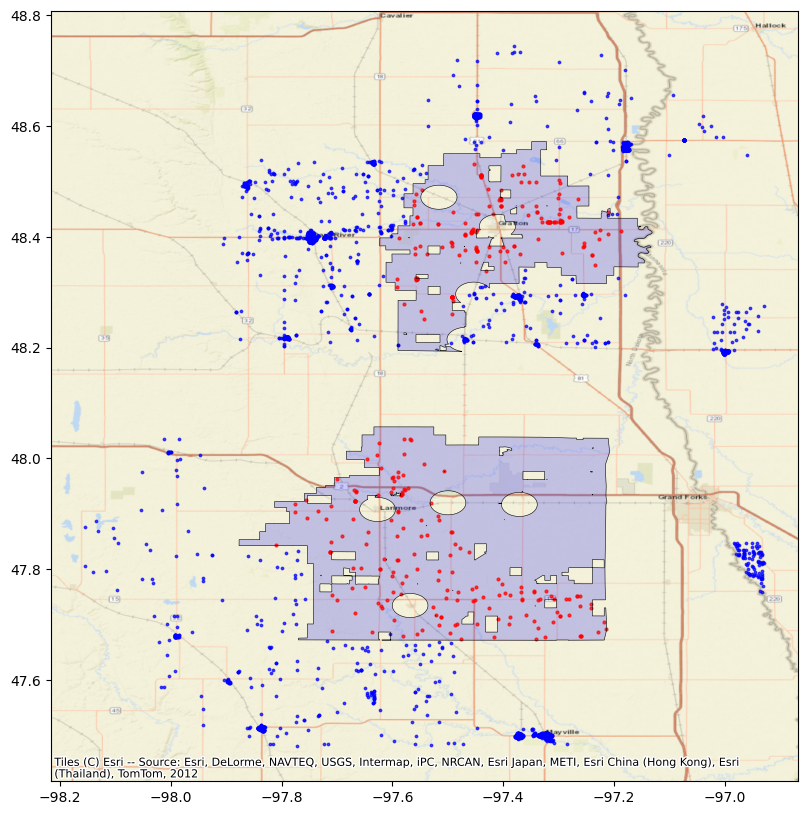

In [126]:
ax = proj_gdf.geometry.plot(color = 'blue', alpha = 0.2, figsize = (10,10))
proj_gdf.geometry.boundary.plot(ax = ax, color = 'black', linewidth=0.4)

buffer_gdf.plot(ax = ax, color = 'blue', markersize = 3, alpha = 0.7)
sub_gdf.plot(ax = ax, color = 'red', markersize = 4, alpha = 0.7)

cx.add_basemap(ax, crs=proj_gdf.crs.to_string(), source = cx.providers.Esri.WorldStreetMap)

In [140]:
bk_gdf.loc[:, ['building_area', 'property_state']].value_counts()

building_area  property_state
0              ND                2963
               MN                 149
1568           MN                   3
1416           MN                   3
1040           MN                   3
                                 ... 
757            MN                   1
1217           MN                   1
1216           MN                   1
1206           MN                   1
7019           MN                   1
Length: 129, dtype: int64

In [132]:
buffer_cleaned["property_state"].value_counts()

ND    460
MN    170
Name: property_state, dtype: int64

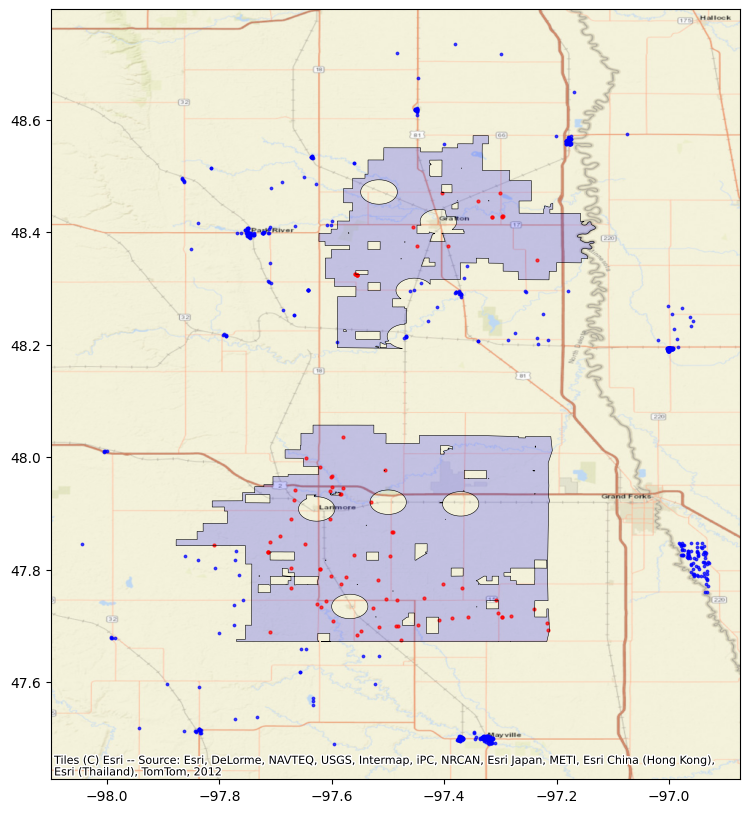

In [127]:
ax = proj_gdf.geometry.plot(color = 'blue', alpha = 0.2, figsize = (10,10))
proj_gdf.geometry.boundary.plot(ax = ax, color = 'black', linewidth=0.4)

buffer_cleaned.plot(ax = ax, color = 'blue', markersize = 3, alpha = 0.7)
subscr_cleaned.plot(ax = ax, color = 'red', markersize = 4, alpha = 0.7)

cx.add_basemap(ax, crs=proj_gdf.crs.to_string(), source = cx.providers.Esri.WorldStreetMap)

# save data

In [142]:
buffer_cleaned.to_csv("../data/ndproject/ndbuffer_scraped_nonempty.csv")
subscr_cleaned.to_csv("../data/ndproject/ndsubscr_scraped_nonempty.csv")

In [146]:
subscr_cleaned_strict = sub_gdf[~sub_gdf["bedrooms"].isna() & ~sub_gdf["bathrooms"].isna() & ~sub_gdf["sqft"].isna()]
subscr_cleaned_strict.shape[0]

68

In [147]:
buffer_cleaned_strict = buffer_gdf[~buffer_gdf["bedrooms"].isna() & ~buffer_gdf["bathrooms"].isna() & ~buffer_gdf["sqft"].isna()]
buffer_cleaned_strict.shape[0]

455

In [149]:
buffer_cleaned_strict.to_csv("../data/ndproject/ndbuffer_scraped_allthree.csv")
subscr_cleaned_strict.to_csv("../data/ndproject/ndsubscr_scraped_allthree.csv")

In [155]:
bk_gdf[bk_gdf['property_state'] == 'ND'].loc[:, ['total_numberof_rooms', 'numberof_bedrooms', 'numberof_baths', 'building_area']].value_counts()

total_numberof_rooms  numberof_bedrooms  numberof_baths  building_area
0                     0                  0               0                2963
dtype: int64

In [156]:
bk_gdf[bk_gdf['property_state'] == 'ND'].to_csv("../data/ndproject/nd_bk_problematic.csv")